NameError: name 'col' is not defined

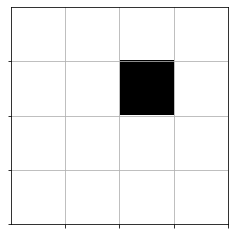

In [116]:
nrows=ncols=4
ax = plt.gca()
ax.set_xticks(np.arange(0.5, nrows, 1))
ax.set_yticks(np.arange(0.5, ncols, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid('on')
plt.imshow(maze, cmap='gray')

In [184]:
import numpy as np
import random
import copy

maze = [
    [1, 1, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 1]
]

start = (0, 0)
goal = (len(maze) - 1, len(maze[0]) - 1)
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 右，下，左，上
n_states = len(maze) * len(maze[0])

def is_valid_move(state, action):
    row, col = state
    row += action[0]
    col += action[1]

    if row < 0 or row >= len(maze) or col < 0 or col >= len(maze[0]):
        return False
    return maze[row][col] == 1

def step(state, action):
    if not is_valid_move(state, action):
        return state, -0.75
    
    row, col = state
    row += action[0]
    col += action[1]

    if (row, col) == goal:
        return (row, col), 1
    return (row, col), -0.04

trajectory_set = []
N_set = []
Q_set = []
G_set = []

def monte_carlo(episodes, alpha, gamma):
    Q = np.zeros((len(maze), len(maze[0]), len(actions)))
    N = np.zeros((len(maze), len(maze[0]), len(actions)))

    for _ in range(episodes):
        state = start
        trajectory = []

        while state != goal:
            action_idx = random.randint(0, len(actions) - 1)
            action = actions[action_idx]
            next_state, reward = step(state, action)

            trajectory.append((state, action_idx, reward))
            state = next_state
                    
        G = 0
        for t in range(len(trajectory) - 1, -1, -1):
            state, action_idx, reward = trajectory[t]
            G = gamma * G + reward
            N[state[0], state[1], action_idx] += 1
            Q[state[0], state[1], action_idx] += (G - Q[state[0], state[1], action_idx]) / N[state[0], state[1], action_idx]
            
        trajectory_set.append(trajectory)
        N_set.append(copy.deepcopy(N))
        Q_set.append(copy.deepcopy(Q))
        G_set.append(copy.deepcopy(G))

    return Q

def find_optimal_path(Q):
    state = start
    optimal_path = [state]

    while state != goal:
        action_idx = np.argmax(Q[state[0], state[1]])
        action = actions[action_idx]
        state = (state[0] + action[0], state[1] + action[1])
        optimal_path.append(state)

    return optimal_path

In [185]:
def test_monte_carlo(episodes=500, alpha=0.1, gamma=0.99, max_steps=1000):
    Q = monte_carlo(episodes, alpha, gamma)
    optimal_path = find_optimal_path(Q)

    print("Optimal path:")
    for state in optimal_path:
        print(state)

    print("\nMaze with optimal path:")
    display_maze_with_path(maze, optimal_path)

Optimal path:
(0, 0)
(1, 0)
(2, 0)
(2, 1)
(2, 2)
(3, 2)
(3, 3)

Maze with optimal path:


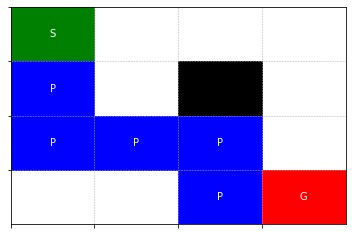

In [186]:
def display_maze_with_path(maze, path):
    fig, ax = plt.subplots()

    for row in range(len(maze)):
        for col in range(len(maze[0])):
            if maze[row][col] == 0:
                ax.add_patch(patches.Rectangle((col, row), 1, 1, color='black'))

    for row, col in path:
        if (row, col) == start:
            color = 'green'
            label = 'S'
        elif (row, col) == goal:
            color = 'red'
            label = 'G'
        else:
            color = 'blue'
            label = 'P'

        ax.add_patch(patches.Rectangle((col, row), 1, 1, color=color))
        ax.text(col + 0.5, row + 0.5, label, ha='center', va='center', color='white')

    ax.set_xlim(0, len(maze[0]))
    ax.set_ylim(0, len(maze))
    ax.set_xticks(np.arange(0, len(maze[0]), 1))
    ax.set_yticks(np.arange(0, len(maze), 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, linestyle='--', linewidth=0.5)

    plt.gca().invert_yaxis()
    plt.show()

if __name__ == "__main__":
    test_monte_carlo()


In [187]:
def moving_average(data_list, window_size=100):
    moving_averages = []
    for i in range(len(data_list)):
        if i < window_size:
            window_data = data_list[:i + 1]
        else:
            window_data = data_list[i - window_size + 1:i + 1]
        average = sum(window_data) / len(window_data)
        moving_averages.append(average)
    
    return moving_averages

def plot_history(episode_history, title='Result', ylabel='Rewards', hline=None, y_upper=None, y_lower=None, window_size=100):
    plt.figure()
    plt.title(title)
    plt.xlabel('episode')
    plt.ylabel(ylabel)
    
    if hline is not None:
        plt.axhline(y=hline, color='Red', linestyle='--')
    if y_upper is not None and y_lower is not None:
        plt.ylim([y_lower, y_upper])
    
    plt.plot(episode_history)
    
    moving_averages = moving_average(episode_history, window_size)
    plt.plot(moving_averages)
    
    plt.show()

In [188]:
len(G_set)

500

In [189]:
max(G_set)

0.7549502494999998

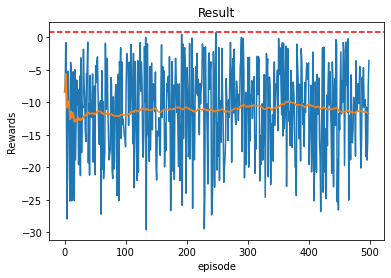

In [191]:
plot_history(G_set, hline=0.8)

In [246]:
episode = 100

In [247]:
import numpy as np
import pandas as pd

index = []
# 定义行名和列名
for i in range(4):
    for j in range(4):
        index.append((i, j))
# index = [(j, i) for i in range(1, 4, 1) for j in range(3, 0, -1)]
columns = ['→', '↓', '←', '↑']
episodes = ['1', '5', '10', 'Final']

# 定义一个数组
# for i, my_array in enumerate(Q_set):
my_array = Q_set[episode]

# # 将数组转换为DataFrame格式
df = pd.DataFrame(my_array.reshape(-1, 4), index=index, columns=columns)
df = df.round(1)

# # 打印结果
# print(f'=========Episode 0 Q-Table=========')
df

,→,↓,←,↑
"(0, 0)",-12.2,-10.3,-12.3,-12.0
"(0, 1)",-12.0,-11.1,-12.5,-11.6
"(0, 2)",-10.8,-13.3,-12.3,-12.7
"(0, 3)",-11.6,-7.7,-12.1,-9.7
"(1, 0)",-10.6,-9.7,-10.4,-10.8
"(1, 1)",-10.5,-7.7,-10.8,-11.8
"(1, 2)",0.0,0.0,0.0,0.0
"(1, 3)",-10.1,-4.0,-8.3,-10.4
"(2, 0)",-6.5,-10.0,-9.4,-10.5
"(2, 1)",-6.5,-7.0,-8.0,-8.5


In [248]:
# 定义一个数组
# for i, my_array in enumerate(Q_set):
my_array = N_set[episode]

# # 将数组转换为DataFrame格式
df = pd.DataFrame(my_array.reshape(-1, 4), index=index, columns=columns)
df = df.round(1)

# # 打印结果
print(f'=========Episode 0 N-Table=========')
df

=========Episode 0 N-Table=========


,→,↓,←,↑
"(0, 0)",240.0,256.0,235.0,238.0
"(0, 1)",173.0,165.0,196.0,205.0
"(0, 2)",175.0,166.0,141.0,162.0
"(0, 3)",148.0,119.0,143.0,123.0
"(1, 0)",189.0,200.0,195.0,199.0
"(1, 1)",163.0,150.0,157.0,153.0
"(1, 2)",0.0,0.0,0.0,0.0
"(1, 3)",96.0,95.0,84.0,87.0
"(2, 0)",128.0,122.0,149.0,175.0
"(2, 1)",118.0,97.0,113.0,106.0


In [243]:
trajectory_set[episode]

[((0, 0), 0, -0.04),
 ((0, 1), 2, -0.04),
 ((0, 0), 1, -0.04),
 ((1, 0), 2, -0.75),
 ((1, 0), 1, -0.04),
 ((2, 0), 0, -0.04),
 ((2, 1), 1, -0.04),
 ((3, 1), 2, -0.04),
 ((3, 0), 2, -0.75),
 ((3, 0), 3, -0.04),
 ((2, 0), 2, -0.75),
 ((2, 0), 3, -0.04),
 ((1, 0), 0, -0.04),
 ((1, 1), 3, -0.04),
 ((0, 1), 3, -0.75),
 ((0, 1), 0, -0.04),
 ((0, 2), 0, -0.04),
 ((0, 3), 1, -0.04),
 ((1, 3), 2, -0.75),
 ((1, 3), 0, -0.75),
 ((1, 3), 3, -0.04),
 ((0, 3), 1, -0.04),
 ((1, 3), 2, -0.75),
 ((1, 3), 3, -0.04),
 ((0, 3), 2, -0.04),
 ((0, 2), 3, -0.75),
 ((0, 2), 3, -0.75),
 ((0, 2), 1, -0.75),
 ((0, 2), 2, -0.04),
 ((0, 1), 1, -0.04),
 ((1, 1), 1, -0.04),
 ((2, 1), 3, -0.04),
 ((1, 1), 2, -0.04),
 ((1, 0), 1, -0.04),
 ((2, 0), 0, -0.04),
 ((2, 1), 0, -0.04),
 ((2, 2), 1, -0.04),
 ((3, 2), 0, 1)]

In [244]:
policy = np.zeros((4, 4), dtype=float)
grid = Q_set[episode]

for i in range(4):
    for j in range(4):
        policy[i][j] = np.argmax(grid[(i, j)])

print(policy)

[[1. 1. 3. 1.]
 [1. 1. 0. 2.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]]


In [245]:
policy_ = policy.tolist()
directions = {0: '→', 1: '↓', 2: '←', 3: '↑'}

# 将数字替换为相应的方向符号
for i in range(4):
    for j in range(4):
        policy_grid[i][j] = directions.get(policy_[i][j], grid[i][j])

# 打印结果
for row in policy_grid:
    print(row)

['↓', '↓', '↑', '↓']
['↓', '↓', '→', '←']
['→', '→', '↓', '↓']
['→', '→', '→', '→']


In [249]:
p = [((0, 0), 0, -0.04),
 ((0, 1), 2, -0.04),
 ((0, 0), 1, -0.04),
 ((1, 0), 2, -0.75),
 ((1, 0), 1, -0.04),
 ((2, 0), 0, -0.04),
 ((2, 1), 1, -0.04),
 ((3, 1), 2, -0.04),
 ((3, 0), 2, -0.75),
 ((3, 0), 3, -0.04),
 ((2, 0), 2, -0.75),
 ((2, 0), 3, -0.04),
 ((1, 0), 0, -0.04),
 ((1, 1), 3, -0.04),
 ((0, 1), 3, -0.75),
 ((0, 1), 0, -0.04),
 ((0, 2), 0, -0.04),
 ((0, 3), 1, -0.04),
 ((1, 3), 2, -0.75),
 ((1, 3), 0, -0.75),
 ((1, 3), 3, -0.04),
 ((0, 3), 1, -0.04),
 ((1, 3), 2, -0.75),
 ((1, 3), 3, -0.04),
 ((0, 3), 2, -0.04),
 ((0, 2), 3, -0.75),
 ((0, 2), 3, -0.75),
 ((0, 2), 1, -0.75),
 ((0, 2), 2, -0.04),
 ((0, 1), 1, -0.04),
 ((1, 1), 1, -0.04),
 ((2, 1), 3, -0.04),
 ((1, 1), 2, -0.04),
 ((1, 0), 1, -0.04),
 ((2, 0), 0, -0.04),
 ((2, 1), 0, -0.04),
 ((2, 2), 1, -0.04),
 ((3, 2), 0, 1)]

In [250]:
len(p)

38

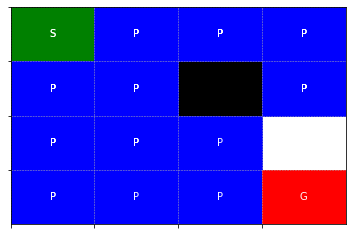

In [254]:
path_train = []
for i in range(len(p)):
    path_train.append(p[i][0])
path_train.append((3,3))
display_maze_with_path(maze, path_train)

Optimal path:
(0, 0)
(1, 0)
(1, 1)
(2, 1)
(3, 1)
(3, 2)
(3, 3)

Maze with optimal path:


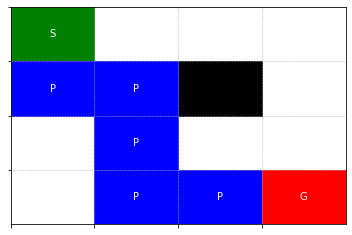

In [273]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 其他代码保持不变...

reward_set = []
trajectory_set = []
N_set = []
Q_set = []
G_set = []

def q_learning(episodes, alpha, gamma, epsilon):
    Q = np.zeros((len(maze), len(maze[0]), len(actions)))
    
    
    for _ in range(episodes):
        state = start
        acc_reward = 0
        acc_trajectory = []
        
        while state != goal:
            if random.uniform(0, 1) < epsilon:
                action_idx = random.randint(0, len(actions) - 1)
            else:
                action_idx = np.argmax(Q[state[0], state[1]])

            action = actions[action_idx]
            next_state, reward = step(state, action)
            acc_trajectory.append((state, action, reward))
            acc_reward += reward

            Q[state[0], state[1], action_idx] = Q[state[0], state[1], action_idx] + alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action_idx])

            state = next_state
            
        reward_set.append(acc_reward)
        trajectory_set.append(acc_trajectory)
        Q_set.append(copy.deepcopy(Q))

    return Q

def test_q_learning(episodes=100, alpha=0.1, gamma=0.99, epsilon=0.1, max_steps=1000):
    Q = q_learning(episodes, alpha, gamma, epsilon)
    optimal_path = find_optimal_path(Q)

    print("Optimal path:")
    for state in optimal_path:
        print(state)

    print("\nMaze with optimal path:")
    display_maze_with_path(maze, optimal_path)

if __name__ == "__main__":
    test_q_learning()


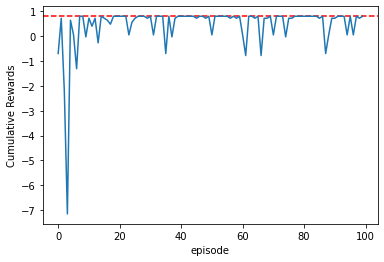

In [304]:
title='Result'
ylabel='Cumulative Rewards'

plt.figure()
plt.title('')
plt.xlabel('episode')
plt.ylabel(ylabel)


plt.axhline(y=0.8, color='Red', linestyle='--')


plt.plot(reward_set)


plt.show()

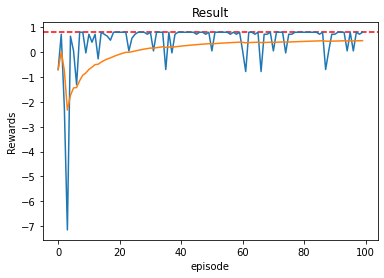

In [300]:
plot_history(reward_set, hline=0.8)

In [315]:
t = trajectory_set[99]
t

[((0, 0), (1, 0), -0.04),
 ((1, 0), (0, 1), -0.04),
 ((1, 1), (1, 0), -0.04),
 ((2, 1), (1, 0), -0.04),
 ((3, 1), (0, 1), -0.04),
 ((3, 2), (0, 1), 1)]

In [316]:
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 右，下，左，上
directions = {0: '→', 1: '↓', 2: '←', 3: '↑'}

In [317]:
display_trajectory = []
for e in t:
    for i, a in enumerate(actions):
        if e[1] == a:
            display_trajectory.append((e[0], directions[i], e[2]))

In [318]:
display_trajectory

[((0, 0), '↓', -0.04),
 ((1, 0), '→', -0.04),
 ((1, 1), '↓', -0.04),
 ((2, 1), '↓', -0.04),
 ((3, 1), '→', -0.04),
 ((3, 2), '→', 1)]

In [305]:
episode = 99

In [306]:
Q_set[episode]

array([[[-0.06778534,  0.67204684, -0.22639842, -0.17798052],
        [-0.04429698,  0.04050437, -0.04534149, -0.14619251],
        [-0.02688651, -0.14336605, -0.02811737, -0.075     ],
        [-0.075     ,  0.02173563, -0.00931956, -0.075     ]],

       [[ 0.76793391, -0.04110868, -0.08153019,  0.04190778],
        [-0.11248798,  0.83847031,  0.07628261, -0.0392178 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [-0.075     ,  0.20012612,  0.        ,  0.        ]],

       [[ 0.15489329, -0.02046354, -0.075     , -0.02979016],
        [-0.0102559 ,  0.89709289, -0.01295724,  0.12150296],
        [ 0.05304537,  0.20287528,  0.        ,  0.        ],
        [-0.075     ,  0.65132156,  0.        ,  0.        ]],

       [[ 0.0998977 , -0.1425    , -0.1432524 , -0.00852977],
        [ 0.94928667, -0.00132284, -0.00616289,  0.15629391],
        [ 0.99992382,  0.04849137,  0.1461114 ,  0.02220034],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]])

In [319]:
# 定义一个数组
# for i, my_array in enumerate(Q_set):
my_array = Q_set[episode]

# # 将数组转换为DataFrame格式
df = pd.DataFrame(my_array.reshape(-1, 4), index=index, columns=columns)
df = df.round(3)

# # 打印结果
print(f'=========Episode 0 N-Table=========')
df

=========Episode 0 N-Table=========


,→,↓,←,↑
"(0, 0)",-0.068,0.672,-0.226,-0.178
"(0, 1)",-0.044,0.041,-0.045,-0.146
"(0, 2)",-0.027,-0.143,-0.028,-0.075
"(0, 3)",-0.075,0.022,-0.009,-0.075
"(1, 0)",0.768,-0.041,-0.082,0.042
"(1, 1)",-0.112,0.838,0.076,-0.039
"(1, 2)",0.000,0.000,0.000,0.000
"(1, 3)",-0.075,0.200,0.000,0.000
"(2, 0)",0.155,-0.020,-0.075,-0.030
"(2, 1)",-0.010,0.897,-0.013,0.122


In [308]:
policy = np.zeros((4, 4), dtype=float)
grid = Q_set[episode]

for i in range(4):
    for j in range(4):
        policy[i][j] = np.argmax(grid[(i, j)])

print(policy)

[[1. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]]


In [309]:
policy_ = policy.tolist()
directions = {0: '→', 1: '↓', 2: '←', 3: '↑'}

# 将数字替换为相应的方向符号
for i in range(4):
    for j in range(4):
        policy_grid[i][j] = directions.get(policy_[i][j], grid[i][j])

# 打印结果
for row in policy_grid:
    print(row)

['↓', '↓', '→', '↓']
['→', '↓', '→', '↓']
['→', '↓', '↓', '↓']
['→', '→', '→', '→']


In [310]:
trajectory_set[1][0][0]

(0, 0)

In [314]:
trajectory_set[episode]

[((0, 0), (1, 0), -0.04),
 ((1, 0), (0, 1), -0.04),
 ((1, 1), (1, 0), -0.04),
 ((2, 1), (1, 0), -0.04),
 ((3, 1), (0, 1), -0.04),
 ((3, 2), (0, 1), 1)]

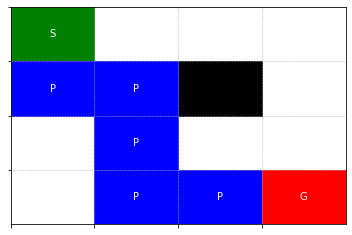

In [313]:
path_train = []
for i in range(len(trajectory_set[episode])):
    path_train.append(trajectory_set[episode][i][0])
path_train.append((3,3))
display_maze_with_path(maze, path_train)